In [1]:
import matplotlib.pyplot as plt #для визуализации
# импортируем библиотеки для работы с данными
import pandas as pd
from sklearn import preprocessing 
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
import numpy as np #для матричных вычислений
# импортируем seaborn для визуализации
import seaborn as sns
from imblearn.over_sampling import SMOTE


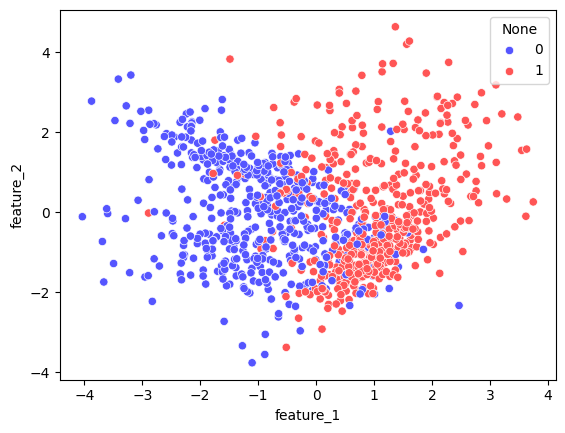

In [2]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');


<Axes: xlabel='feature_1', ylabel='feature_2'>

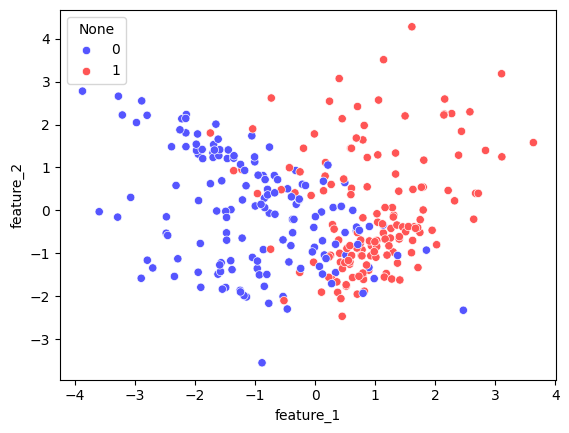

In [5]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
sns.scatterplot(x=X_valid['feature_1'], y=X_valid['feature_2'], hue=y, palette='seismic')


In [9]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(max_depth=10)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X_train, y_train)
y_train_pred = dt_clf_2d.predict(X_train)
y_valid_pred = dt_clf_2d.predict(X_valid)
print(format(metrics.accuracy_score(y_train, y_train_pred)))
print(format(metrics.accuracy_score(y_valid, y_valid_pred)))


0.9785714285714285
0.82


In [10]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))


C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


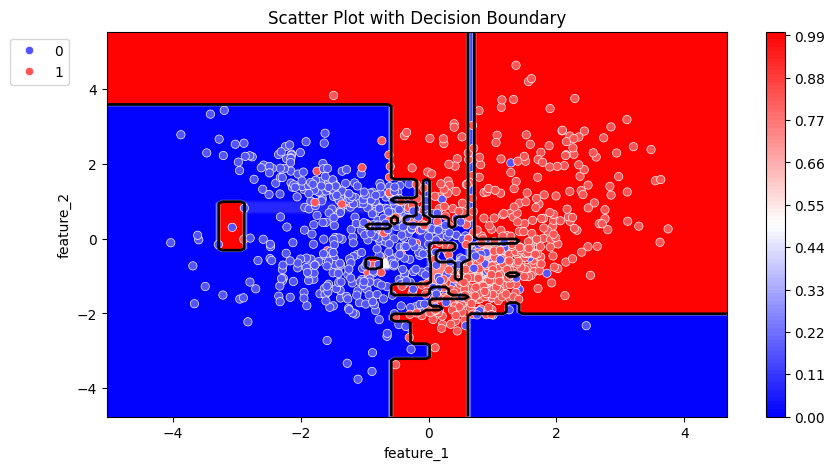

In [11]:
plot_probabilities_2d(X, y, dt_clf_2d)


In [14]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d_restr = tree.DecisionTreeClassifier(max_depth=3)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d_restr.fit(X_train, y_train)
y_train_pred_restr = dt_clf_2d_restr.predict(X_train)
y_valid_pred_restr = dt_clf_2d_restr.predict(X_valid)
print(format(metrics.accuracy_score(y_train, y_train_pred_restr)))
print(format(metrics.accuracy_score(y_valid, y_valid_pred_restr)))


0.88
0.85


C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


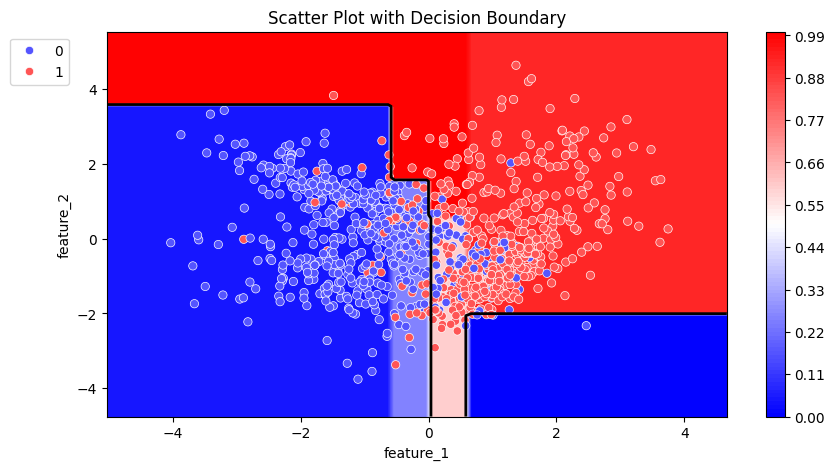

In [15]:
plot_probabilities_2d(X, y, dt_clf_2d_restr)
